# Important Library

In [103]:
import os
from collections import defaultdict

import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

import statistics
import math
import random
from statistics import mean
from scipy import stats
from scipy.stats import pearsonr
from scipy.integrate import quad

display(HTML("<style>.container { width:80% !important; }</style>")) # change the size of the coding window
# pd.set_option('display.max_colwidth', 150) # to display the full text on the notebook without truncation
InteractiveShell.ast_node_interactivity = "last_expr"

# np.set_printoptions(threshold=np.inf)

# Framework: Cue Combination

$$P(d| m, t) 
\propto P(m, t | d) P(d) = P(m|d) P(t|d) P(d)$$ 

$$p(d \mid m) =\frac{1}{\sqrt{2 \pi \sigma_m^2}} \exp \left\{-\frac{1}{2 \sigma_m^2}\left(d-d_m\right)^2\right\}$$


$$p(d \mid t) =\frac{1}{\sqrt{2 \pi \sigma_t^2}} \exp \left\{-\frac{1}{2 \sigma_t^2}\left(d-d_t\right)^2\right\}$$


$$
\begin{gathered}
d^*=\frac{\frac{1}{\sigma_m^2} d_m+\frac{1}{\sigma_t^2} d_t}{\frac{1}{\sigma_m^2}+\frac{1}{\sigma_t^2}} \\
\sigma_{m, t}^2=\frac{1}{\frac{1}{\sigma_m^2}+\frac{1}{\sigma_t^2}}=\frac{\sigma_m^2 \sigma_t^2}{\sigma_m^2+\sigma_t^2} .
\end{gathered}
$$

$$p(d \mid m, t) =\frac{1}{\sqrt{2 \pi \sigma_{m, t}^2}} \exp \left\{-\frac{1}{2 \sigma_{m, t}^2}\left(d-d^*\right)^2\right\}$$

Assume $d_m = 1, d_t = 2, \sigma_m^2 = 3, \sigma_t^2 = 2$ 

In [104]:
def normal(x, mu, variance):
    p = 1 / math.sqrt(2 * math.pi * variance)
    return p * np.exp(-0.5 / variance * (x - mu)**2)

def combined_mean (dm, dt, vm, vt):
    return (1/vm*dm +1/vt*dt) / (1/vm + 1/vt)

def combined_variance (vm, vt):
    return 1/(1/vm + 1/vt)

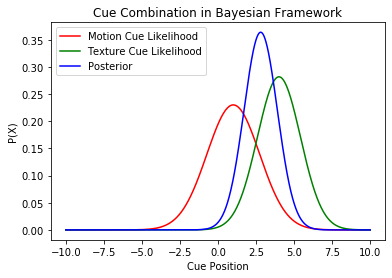

In [105]:
dm = 1
vm = 3

dt = 4
vt = 2
x = np.arange(-10, 10, 0.01)
 
ddash = combined_mean (dm, dt, vm, vt)
vdash = combined_variance (vm, vt)
# Mean, Standard deviation pairs
params = [(dm, vm), (dt,vt), (ddash, vdash)]
 
# Plotting different normal distribution curves simultaneously
plt.plot(x, normal(x, params[0][0], params[0][1]), color='r', label='Motion Cue Likelihood')
plt.plot(x, normal(x, params[1][0], params[1][1]), color='g', label='Texture Cue Likelihood')
# plt.axhline(y=0.1, color='grey', linestyle='-', label='Uniform Prior')

# How to combine the prior?
plt.plot(x, normal(x, params[2][0], params[2][1]), color='b', label='Posterior')
   
plt.xlabel("Cue Position")
plt.ylabel("P(X)")
plt.title("Cue Combination in Bayesian Framework")
   
plt.legend()
plt.show()

(CK) As a learning exercise it would be good to compute the posterior assuming that you don't know the expressions for `combined_mean()` and `combined_variance()`. You can
1. First compute an unnormalized posterior by multiplying the motion likelihood and texture likelihood
2. Normalize the posterior to create a valid probability density.
The code below shows step 1.

See if you can figure out why following steps 1 and 2 is a valid way to compute the posterior!

In [106]:

norm, err = quad(lambda x: normal(x, params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), -np.inf, np.inf)
print(norm)

result, err = quad(lambda x: 1/norm * normal(x,  params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), -np.inf, np.inf)

print(result)

0.0725370734839233
0.9999999999999947


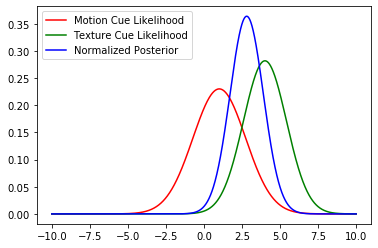

In [107]:
plt.plot(x, normal(x, params[0][0], params[0][1]), color='r', label='Motion Cue Likelihood')
plt.plot(x, normal(x, params[1][0], params[1][1]), color='g', label='Texture Cue Likelihood')
# plot unnormalized posterior (which is the same as the product of the likelihoods)
plt.plot(x, 1/norm * normal(x, params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), color='b', label='Normalized Posterior')
plt.legend()
plt.show()

(CK) After you've adjusted the code above to normalize the posterior, I'd suggest adding a Gaussian prior. You can then compute the unnormalized posterior as the product of the prior, the motion likelihood and the texture likelihood.

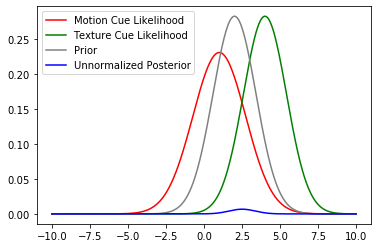

In [108]:
plt.plot(x, normal(x, params[0][0], params[0][1]), color='r', label='Motion Cue Likelihood')
plt.plot(x, normal(x, params[1][0], params[1][1]), color='g', label='Texture Cue Likelihood')
# plot unnormalized posterior (which is the same as the product of the likelihoods)
plt.plot(x, normal(x, 2, 2), color='grey', label='Prior')
plt.plot(x, normal(x, 2, 2) * normal(x, params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), color='b', label='Unnormalized Posterior')
plt.legend()
plt.show()

In [109]:
norm_wprior, err = quad(lambda x: normal(x, 2, 2) * normal(x, params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), -np.inf, np.inf)
print(norm_wprior)

0.01463745788108133


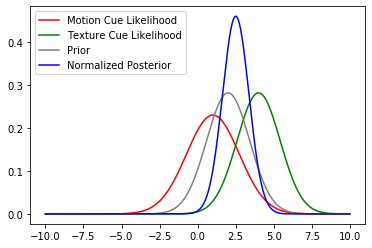

In [110]:
plt.plot(x, normal(x, params[0][0], params[0][1]), color='r', label='Motion Cue Likelihood')
plt.plot(x, normal(x, params[1][0], params[1][1]), color='g', label='Texture Cue Likelihood')
# plot unnormalized posterior (which is the same as the product of the likelihoods)
plt.plot(x, normal(x, 2, 2), color='grey', label='Prior')
plt.plot(x, 1/norm_wprior * normal(x, 2, 2) * normal(x, params[0][0], params[0][1]) * normal(x, params[1][0], params[1][1]), color='b', label='Normalized Posterior')
plt.legend()
plt.show()

# Conceptual Modelling

$$
\begin{array}{l|l|l}
\hline \text { Notation } & \text { In Visual Space Paper } & \text { In Lighthouse Illusion } \\
\hline P(I) \text { Normalisation } & \text { visual stimulus } & P\left(\alpha_n, R_n\right) \\
\hline P(S) \text { Prior } & \text { physical scene } & P\ (\alpha, R) \\
\hline P(I \mid S) \text { Likelihood } & \text { stimulus generated by the scene } & P\left(\alpha_n, R_n \mid \alpha, R\right)=P(\alpha_n \mid \alpha)P(R_n \mid R) \\
\hline P(S \mid I) \text { Posterior } & \text { physical sources S (true locations) underlying a visual stimulus}  & P\left(\alpha_n, \alpha\right) P\left(R_n, R\right) \\
\hline
\end{array}
$$

$$P(\alpha, R | \alpha_0, R_0) 
\propto P(\alpha_0, R_0 | \alpha, R) P(\alpha, R)
                                                  = P(\alpha_0|\alpha) P(R_0|R) P(\alpha,R)$$

##  Prior

### Pinhole Camera Model
Source: https://github.com/JarnoRalli/python_camera_library/blob/main/cameralib.py

In [111]:
def homogenise(points: np.array):
    """Converts non-homogeneous 2D or 3D coordinates into homogeneous coordinates.
    For example
    [x1 x2 x3]    [x1 x2 x3]
    [y1 y2 y3] -> [y1 y2 y3]
                  [1  1  1]
    Parameters
    ----------
    points : numpy.array, shape (dimensions, nr_points)
    Returns
    --------
    points : numpy.array, shape (dimensions+1, nr_points)
    """

    return np.concatenate((points, np.ones((1, points.shape[1]))), axis=0)

def forwardprojectP(points: np.array, P: np.array, image_size, image=None):
    """
    # Project 3D points, defined by [X Y Z]', onto an image plane defined by a 3x4 projection matrix P.
    # Returns those 3D points that are withing the FOV of the camera (i.e. filters out those points
      that are outside of the FOV), the corresponding uv-image coordinates, and a depth map.
    
    # Additionally, if an image is given, RGB for each 3D point is returned - None 
    
    Parameters
    ----------
    points : numpy.array, shape (3, nr_points)
    P : numpy array, shape (3, 4), Camera projection matrix P = K[R | t]
        In our case, as camera is positioned in the center, 
        [R | t] = [1, 0, 0, 0]
                  [0, 1, 0, 0]
                  [0, 0, 1, 0]
        K = [f, 0, px ]    [0.01,    0, 216]
            [0, f, py ] => [   0, 0.01, 216] 
            [0, 0,  1 ]    [   0,    0,   1]
                  
    image_size : tuple
            Image size, (512, 512)
    image : numpy.array, optional
            Image used for defining colors for each point (default is None).
    
    Returns
    -------
    Our Case:
    (3D points, uv-coordinates, depth map) : numpy array
        If no image is given (i.e. is None). Shapes are (3, nr_points), (3, nr_points) and (rows, cols)
    (3D points, uv-coordinates, RGB, depth map) : numpy array
        If image is given. Shapes are (3, nr_points), (3, nr_points), (3, nr_points) and (rows, cols)
    """

    # Convert the image_size into a tuple. It might already be a tuple, but let's just make sure
    image_size = (int(image_size[0]), int(image_size[1]))
    depth_map = np.ones(image_size) * np.nan

    try:
        # Convert points into homogeneous form
        points = homogenise(points)

        # Project points to image
        uv = np.matmul(P, points)

        # Filter points that fall behind the camera
        mask = uv[2, :] < 0.0
        uv = uv[:, ~mask]
        points = points[:, ~mask]

        # Normalize coordinates
        uv[0, :] /= uv[2, :]
        uv[1, :] /= uv[2, :]
        uv[2, :] /= uv[2, :]

        # Mask out points that don't fall withing the given image (i.e. are outside of FOV)
        mask = (uv[0, :] < 0) | (uv[0, :] > (image_size[1] - 1)) | (uv[1, :] < 0) | (uv[1, :] > (image_size[0] - 1))
        points = points[:, ~mask]
        uv = uv[:, ~mask]
        
#         print(np.round(uv[1, :]).astype(int))
        
        # Generate a depth map
        depth_map[np.round(uv[1, :]).astype(int), np.round(uv[0, :]).astype(int)] = points[2, :]

        # Handle colors, if given
        if image is None:
            return points[:3, :], uv, depth_map
        else:
            RGB = image[np.round(uv[1, :]).astype(int), np.round(uv[0, :]).astype(int), :]
            return points[:3, :], uv, RGB, depth_map
    except Exception as e:
        raise

$P(S)$

simple model in which ***1,000*** planar rectangular surfaces were uniformly placed at distances of ***2.5–300*** m, from ***150*** m left to ***150*** m right, and from the ground to ***25 m*** above the ground (which was 1.65 m below the image center). 

The sizes of these uniformly distributed surfaces ranged from ***0.2 to 18*** m. Five-hundred ***512 × 512*** images of this model made by a pinhole camera method showed statistical behavior similar to that derived from the range image database for a wide variety of specific values, although with different slopes and modes. 
    
The ***2.5-m cut-off*** models the presumed tendency of observers to keep physical objects some distance away

- 1000 simulations 
- 500 surfaces
- size of surface U(0.2, 18) 
- horizontal position U(0, 300) 
- vertical position U(0, 25) 
- distance U(2.5, 300)

### One Snapshot

In [112]:
scene_distance = list()

NUM_SURFACES = 500
# the dimensionalities of possible locations of the simulated surfaces
DIM_X = 300 
DIM_Y = 25

# the x-coord, y-coord, distance of each simulated surface
# we store 2 points (left top and right bottom corners) for each surface, use two matrices accordingly
simulations_left_top = np.empty(shape=(3, NUM_SURFACES))
simulations_right_bottom = np.empty(shape=(3, NUM_SURFACES))

for i in range(500):
    size = np.random.randint(0.2, 18)
    
    # CK: because you don't want the rectangles to go underneath the ground, might be better to sample the midpoint of the bottom edge of each rectangle
    # coordinates of the simulated surface center
    coord_x = random.uniform(0, DIM_X + 1)
    coord_x = random.uniform(-150, 150 + 1) # CK: shouldn't x-coordinates be between -150 and 150?
    
    coord_y = random.uniform(0, DIM_Y + 1) # CK: for Yang and Purves the camera is at a height of 1.65 m. I think we should put the camera at the origin (height 0) and adjust the simulation so that the "ground" is at -1.65 m
    
    # store the (x, y) of the left top and right bottom corners of the surface to locate.
    left_top_x = coord_x - size/2
    left_top_y = coord_y + size/2
    
    right_bottom_x = coord_x + size/2
    right_bottom_y = coord_y - size/2
    
    distance = random.uniform(0.2, 18 + 1)
    distance = random.uniform(2.5, 300 + 1)  # CK: shouldn't distances be between 2.5 and 300 m?
    
    simulations_left_top[0][i] = left_top_x
    simulations_left_top[1][i] = left_top_y
    simulations_left_top[2][i] = distance
    
    simulations_right_bottom[0][i] = right_bottom_x
    simulations_right_bottom[1][i] = right_bottom_y
    simulations_right_bottom[2][i] = distance
    

In [113]:
simulations_left_top

array([[-49.81050781, 101.25479898, -92.06361542, ...,  40.76395312,
        -68.25292084,   9.35189094],
       [ 10.2547094 ,  22.04114777,  14.31722203, ...,  19.18634794,
          7.79821398,   6.62206218],
       [ 22.81563613,  79.36391535, 142.65202603, ..., 266.31131213,
         65.53524557,  17.70768552]])

In [114]:
# Projection Matrix 
f = 1
f = 256 # CK: I think we can treat f, px and py as having the same units
px = 256
py = 256
K = np.array([(f, 0, px), 
              (0, f, py),
              (0, 0,  1)])

# no rotation and translation
R_t = np.array([(1, 0, 0, 0), 
                (0, 1, 0, 0),
                (0, 0, 1, 0)])

P = np.matmul(K, R_t)

In [115]:
original, projected, depth = forwardprojectP(simulations_left_top, P, (512, 512))

#for i in range(512):
    #print(depth[i])
    
print(np.shape(projected))

# Output: (Original, Projected, Depth)

(3, 374)


### Prior Distribution for each angle

### Combined with the Likelihood